In [14]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from src.data_loader import get_dataset

In [19]:
# Local sample dataset
csv_path = "../data/sample/sample_labels.csv"
image_dir = "../data/sample/images"

# Kaggle full dataset
#csv_path = "/kaggle/input/nih-chest-xray-data/Data_Entry_2017.csv"
#image_dir = "/kaggle/input/nih-chest-xray-data/images"


In [20]:
dataset, class_names = get_dataset(
    csv_path=csv_path,
    image_dir=image_dir,
    img_size=224,
    batch_size=8,
    shuffle=True,
    augment=False,   # Turn True if you want augmentation
    subset=32        # Small subset for quick visualization; set None for full
)

In [21]:
print("Number of classes:", len(class_names))
print("Classes:", class_names)

Number of classes: 9
Classes: ['Atelectasis', 'Consolidation', 'Effusion', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pneumothorax']


In [22]:
images, labels = next(iter(dataset))

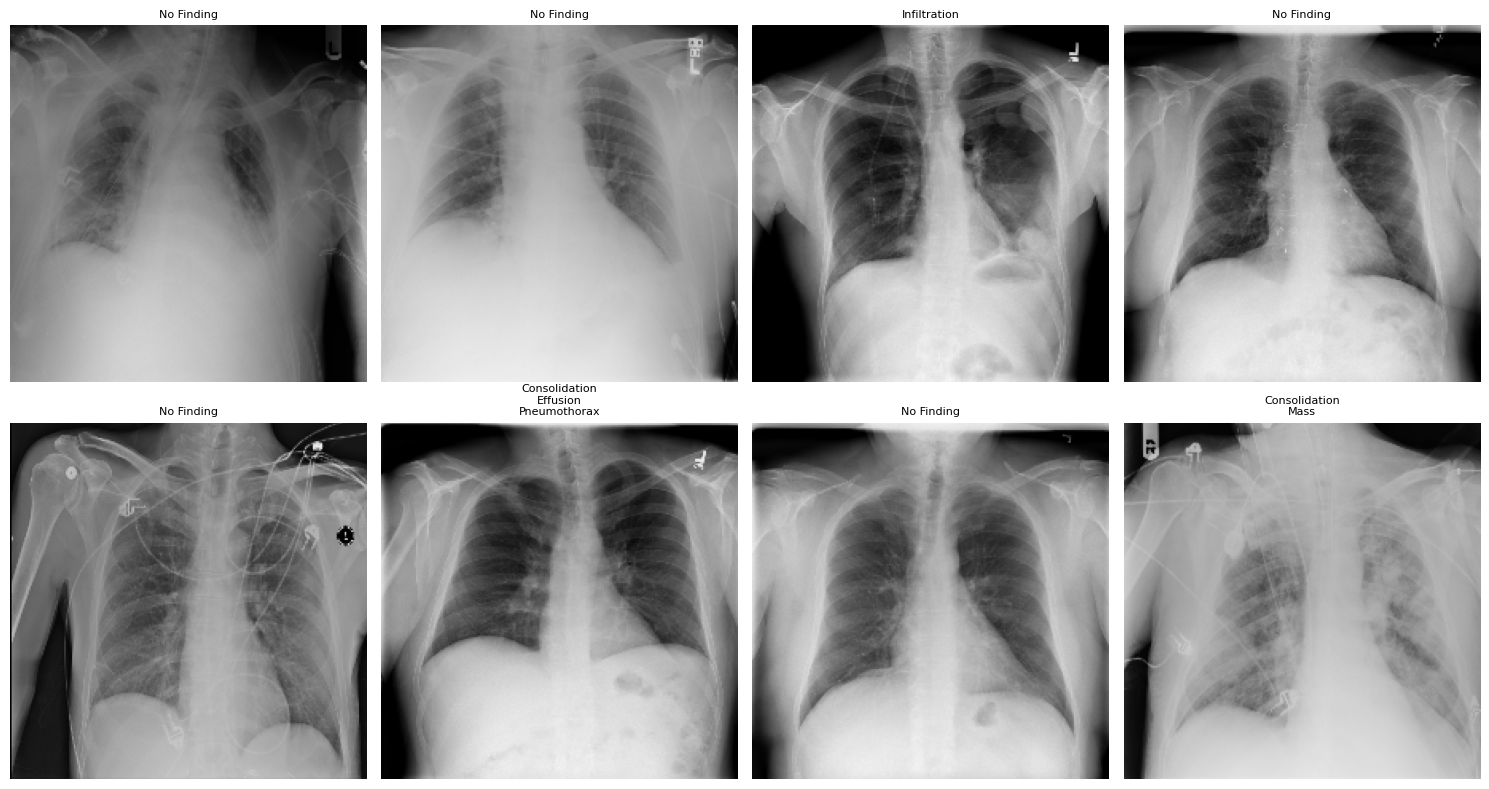

In [23]:
def show_images(images, labels, class_names):
    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        ax = plt.subplot(2, 4, i+1)
        plt.imshow(images[i])
        label_indices = np.where(labels[i].numpy() == 1)[0]
        label_names = [class_names[idx] for idx in label_indices]
        plt.title("\n".join(label_names) if label_names else "No Finding", fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_images(images, labels, class_names)
